In [1]:
import pandas as pd

In [2]:
winedf=pd.read_csv('winequality-red.csv')

In [3]:
winedf.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
winedf.sample(3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1383            8.0              0.60         0.22             2.1      0.080   
693             9.0              0.48         0.32             2.8      0.084   
1247            7.4              0.55         0.19             1.8      0.082   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1383                 25.0                 105.0  0.99613  3.30       0.49   
693                  21.0                 122.0  0.99840  3.32       0.62   
1247                 15.0                  34.0  0.99655  3.49       0.68   

      alcohol  quality  
1383      9.9        5  
693       9.4        5  
1247     10.5        5

In [5]:
winedf['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [11]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='quality', ylabel='count'>

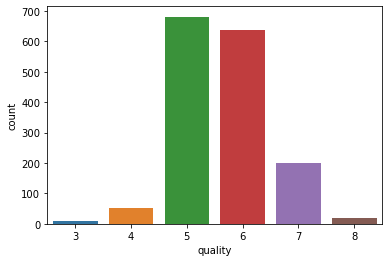

In [13]:
sns.countplot(winedf['quality'])

In [14]:
x=winedf.iloc[:,0:-1]
y=winedf.iloc[:,-1]

In [15]:
x.shape

(1599, 11)

In [16]:
y.shape

(1599,)

In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
sm=SMOTE()
xtrainw,ytrainw=sm.fit_resample(x,y)

ytrainw

0       5
1       5
2       5
3       6
4       5
       ..
4081    8
4082    8
4083    8
4084    8
4085    8
Name: quality, Length: 4086, dtype: int64

In [19]:
ytrainw.value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

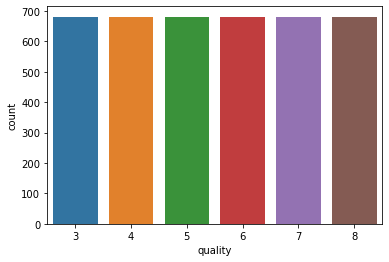

In [20]:
sns.countplot(ytrainw)

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

xtrain,xtest,ytrain,ytest=train_test_split(xtrainw,ytrainw,test_size=.30,random_state=45)

dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)

prd=dtc.predict(xtest)
print('Accuracy ::',accuracy_score(ytest,prd))
confusion_matrix(ytest,prd)

Accuracy :: 0.7822185970636215


array([[214,   3,   3,   0,   0,   0],
       [  1, 164,  18,   9,   4,   0],
       [  6,  27, 120,  40,   6,   0],
       [ 10,   9,  34, 115,  34,   5],
       [  0,   0,   6,  31, 155,   8],
       [  0,   0,   0,   5,   8, 191]], dtype=int64)

In [22]:
prd

array([5, 7, 4, ..., 3, 3, 6], dtype=int64)